#0. Carga de datos

In [ ]:
# Importamos las librerías habituales
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pylab as plt
import numpy as np

Mounted at /content/drive




---


##Cómo levantar el df limpio

In [ ]:
directory = '/content/drive/My Drive/DatosTP/limp'
df = pd.read_pickle('/content/drive/My Drive/DatosTP/limp1.pickle')

In [ ]:
for i in range(2,14):
  path = directory + str(i) + '.pickle'
  df1 = pd.read_pickle(path)
  df = df.append(df1)

In [ ]:
df["raices"] = df["raicesl"]
df["text"] = df["dream"]

#Junta y arma un solo "texto" con las raíces
df['raices_unidas'] = df['raices'].apply(" ".join)

In [ ]:
df.columns

Index(['cohesion', 'intent', 'lucidity', 'raicesl', 'rating', 'technique',
       'url', 'user', 'dream', 'additional_comments', 'themes', 'settings',
       'characters', 'emotions', 'activities', 'raices', 'text',
       'raices_unidas', 'nmf_comp0', 'nmf_comp1', 'nmf_comp2', 'nmf_comp3',
       'nmf_comp4', 'nmf_comp5', 'nmf_comp6', 'nmf_comp7', 'topico_nmf'],
      dtype='object')

Es casi igual que antes, solo que con 13 archivos limp#.pickle  
También cambiaron las columnas:  
['cohesion', 'intent', 'lucidity', 'raicesl', 'rating', 'technique',
       'url', 'user', 'dream', 'additional_comments', 'themes', 'settings',
       'characters', 'emotions', 'activities']

---



#Stopwords

In [ ]:

# Cargamos del paquete nltk las stopwords a la lista "stopwords"
import nltk
nltk.download('stopwords') # hay que descargar este modulo en particular

stopwords = nltk.corpus.stopwords.words('english')

print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk

#no sé si usamos todo esto
nltk.download([
     "names",
     "stopwords",
     "state_union",
     "twitter_samples",
     "movie_reviews",
     "averaged_perceptron_tagger",
     "vader_lexicon",
     "punkt",
])

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   

True

In [ ]:
stopwords += ['get','go','one','like','look','say', 'see', 'back','seen','talk','came','come','may','tell','dream','tumblr', '__']

# 2. ¿Qué sueña la gente?

# Tópicos

In [ ]:
# Importamos las librerías habituales
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pylab as plt
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Objetos de sklearn para hacer tópicos
from sklearn.feature_extraction.text import CountVectorizer # Contador de frecuencia
from sklearn.feature_extraction.text import TfidfTransformer # Creador de tf-idf

# Algoritmos de descomposición de tópicos
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:

# Creamos el objeto contador de palabras, pidiéndole que remueve
# las stopwords, los términos que aparecen en un único documento (min_df)
# y los términos que aparecen en más del 70% de los documentos (max_df).
# Esto es para eliminar palabras raras (o errores de tipeo) y
# términos que seguramente son stopwords no incluídos en la lista
count = CountVectorizer(min_df = 3, max_df = 0.50, stop_words = stopwords)

# Ajustamos con los datos. Acá especificamente creamos una matriz documentos-términos
x_count = count.fit_transform(df['raices_unidas'])

# Dimensions de la matriz doc-tér
print(x_count.shape)

(237446, 67821)


In [ ]:
# Creamos el objeto tf-idf. Le decimos además que devuelva los
# vectores documento con norma euclídea igual a 1 (norm = 'l2')
tfidf = TfidfTransformer(norm = 'l2')

# Creamos la matriz tf-idf a partir de la matriz de frecuencias
x_tfidf = tfidf.fit_transform(x_count)

In [ ]:
# Elijamos la cantidad de tópicos
n_components = 8

# Construímos el objeto NMF con los tópicos indicados
nmf = NMF(n_components = n_components)

# Aplicamos sobre nuestros datos
x_nmf = nmf.fit_transform(x_tfidf)

# Dimensión de la matriz transformada
print(x_nmf.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


(237446, 8)


In [ ]:
# Objeto índice: término de nuestro vocabulario
vocabulary = {item: key for key, item in count.vocabulary_.items()}

topics = []

# Para cada componente
for n in range(n_components):
  # Ordenamos una lista del largo de nuestro vocabulario según el peso en cada componente y nos quedamos con los primeros 10
  list_sorted = sorted(range(nmf.components_.shape[1]), reverse = True, key = lambda x: nmf.components_[n][x])[:10]
  lista = [vocabulary[i] for i in list_sorted]
  topics.append(lista)
  # Printeamos los términos asociados a los valores más grande de cada una de las componentes
  print(', '.join(lista))

  print('\n')

seem, time, man, though, make, would, feel, even, woman, sort


car, drive, road, park, seat, stop, parking, street, truck, driver


think, mom, recall, something, around, house, try, want, since, dad


room, house, door, bed, open, window, walk, floor, run, outside


friend, guy, girl, start, walk, know, want, ask, really, run


school, class, bus, teacher, student, classroom, high, walk, sit, day


water, swim, pool, boat, fish, beach, ocean, lake, jump, run


remember, something, really, know, night, thing, think, much, last, wake




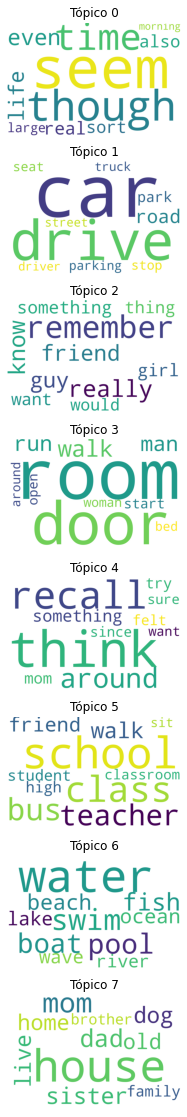

In [ ]:
from wordcloud import WordCloud # importo la funcion WordCloud
import matplotlib.pyplot as plt

# WordClouds
wc_atributos = {'height' : 800,
                'width' : 1200,
                'background_color' : 'white',
                'max_words' : 20
                } # Defino los parámetros que les voy a pasar a los wordclouds

# Creo la figura
fig, axs = plt.subplots(n_components, figsize = (6,20))

# Recorro para todas las componentes
for n in range(n_components):

  # 10 términos más pesados
  list_sorted = sorted(range(len(vocabulary)), reverse = True, key = lambda x: nmf.components_[n][x])[:10]

  # Diccionario término: peso
  comp_dict = {vocabulary[i]: nmf.components_[n][i] for i in list_sorted}

  # Creo el wordlcoud
  wc = WordCloud(**wc_atributos # De esta forma, le estoy diciendo a la función que expanda el diccionario de atributos de forma tal de que entienda lo que quiero que haga
                 ).generate_from_frequencies(comp_dict)

  axs[n].set_title('Tópico {}'.format(n))
  axs[n].imshow(wc)
  axs[n].axis('off')

plt.show()

In [ ]:
# Normalizador
from sklearn.preprocessing import Normalizer

# Creamos un objeto para normalizar a que la suma dé 1
norm = Normalizer('l1')

# Sobreescribimos sobre la matriz de documentos-tópicos
x_nmf = norm.fit_transform(x_nmf)

# Guardemos en el dataframe esta información
for n in range(n_components):
  df['nmf_comp{}'.format(n)] = x_nmf[:,n]

df.head()

In [ ]:
columnas = []
for n in range(n_components):
  columnas.append('nmf_comp{}'.format(n))
columnas.sort()

# find the column name of maximum
# values in every row
maxValueIndex = df[columnas].idxmax(axis = 1)
df["topico_nmf"] = maxValueIndex
df["topico_nmf"].value_counts()

nmf_comp4    60758
nmf_comp0    49200
nmf_comp3    32125
nmf_comp2    20843
nmf_comp6    19053
nmf_comp1    18975
nmf_comp5    18276
nmf_comp7    18216
Name: topico_nmf, dtype: int64

#COherencia de topicos

In [ ]:
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

In [ ]:
# Creating a dictionary with the vocabulary
word2id = Dictionary( df["raices"] )

In [ ]:
# Coherence model
cm = CoherenceModel(topics=topics,
                    texts=df["raices"],
                    coherence='c_v',
                    dictionary=word2id)

coherence_per_topic = cm.get_coherence_per_topic()

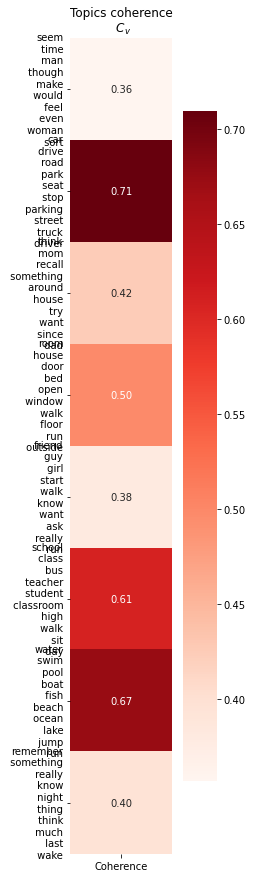

In [ ]:
#Nuevo
topics_str = [ '\n '.join(t) for t in topics ]
data_topic_score = pd.DataFrame( data=zip(topics_str, coherence_per_topic), columns=['Topic', 'Coherence'] )
data_topic_score = data_topic_score.set_index('Topic')

fig, ax = plt.subplots( figsize=(4,15) )
ax.set_title("Topics coherence\n $C_v$")
sns.heatmap(data=data_topic_score, annot=True, square=True,
            cmap='Reds', fmt='.2f',
            linecolor='black', ax=ax )
plt.yticks( rotation=0 )
ax.set_xlabel('')
ax.set_ylabel('')
fig.show()

Pendientes:
- arreglar la cantidad de palabras que aparecen a la izquierda (se superponen)
- Querría cruzar este gráfico con el de los wordclouds

#Analizo diferencia de tópicos en sueños lucidos y no lúcidos

In [ ]:
df_no_lucidos = df[(df["lucidity"]==1.25) + (df["lucidity"]==2.50)]
df_lucidos = df[(df["lucidity"]==3.75) + (df["lucidity"]==5.00)]

In [ ]:
cuenta = df["topico_nmf"].value_counts()

nmf_comp3    29321
nmf_comp2    28783
nmf_comp0    15255
nmf_comp5    10842
nmf_comp6    10391
nmf_comp7    10202
nmf_comp1     9989
nmf_comp4     8940
Name: topico_nmf, dtype: int64

In [ ]:
topicos_porcentaje = df["topico_nmf"].value_counts().sort_index()
topicos_porcentaje = topicos_porcentaje/sum(topicos_porcentaje)
topicos_porcentaje

topicos_porcentaje_lucidos = df_lucidos["topico_nmf"].value_counts().sort_index()
topicos_porcentaje_lucidos = topicos_porcentaje_lucidos/sum(topicos_porcentaje_lucidos)
topicos_porcentaje_lucidos

topicos_porcentaje_no_lucidos = df_no_lucidos["topico_nmf"].value_counts().sort_index()
topicos_porcentaje_no_lucidos = topicos_porcentaje_no_lucidos/sum(topicos_porcentaje_no_lucidos)
topicos_porcentaje_no_lucidos

nmf_comp0    0.212142
nmf_comp1    0.072142
nmf_comp2    0.094247
nmf_comp3    0.136206
nmf_comp4    0.263427
nmf_comp5    0.073170
nmf_comp6    0.078605
nmf_comp7    0.070061
Name: topico_nmf, dtype: float64

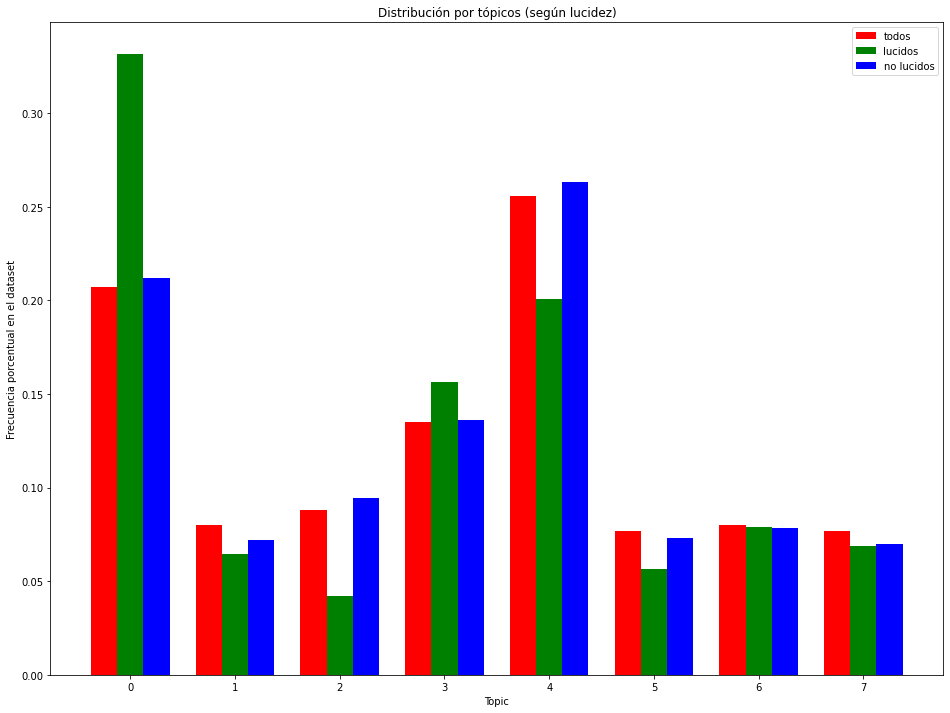

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = len(columnas)
ind = np.arange(N)
width = 0.25

bar1 = plt.bar(ind, topicos_porcentaje, width, color = 'r')

bar2 = plt.bar(ind+width, topicos_porcentaje_lucidos, width, color='g')

bar3 = plt.bar(ind+width*2, topicos_porcentaje_no_lucidos, width, color = 'b')

plt.xlabel("Topic")
plt.ylabel('Frecuencia porcentual en el dataset')
plt.title("Distribución por tópicos (según lucidez)")

plt.xticks(ind+width,range(N))
plt.legend( (bar1, bar2, bar3), ("todos", "lucidos", "no lucidos") )
plt.show()

#Creo nuevos topicos solo para sueños lúcidos

In [ ]:
print(df.shape)
print(df_lucidos.shape)
#print(df_no_lucidos.shape)
df["lucidity"].value_counts()

(237446, 27)
(13498, 27)
(40850, 27)


-1.00    183098
 1.25     23961
 2.50     16889
 3.75      8228
 5.00      5270
Name: lucidity, dtype: int64

In [ ]:
# Creamos el objeto contador de palabras, pidiéndole que remueve
# las stopwords, los términos que aparecen en un único documento (min_df)
# y los términos que aparecen en más del 70% de los documentos (max_df).
# Esto es para eliminar palabras raras (o errores de tipeo) y
# términos que seguramente son stopwords no incluídos en la lista
count = CountVectorizer(min_df = 3, max_df = 0.60, stop_words = stopwords)

# Ajustamos con los datos. Acá especificamente creamos una matriz documentos-términos
x_count_lucido = count.fit_transform(df_lucidos['raices_unidas'])
#x_count_no_lucido = count.fit_transform(df_no_lucidos['raices_unidas'])

# Dimensions de la matriz doc-tér
print(x_count_lucido.shape)
#print(x_count_no_lucido.shape)

(13498, 17546)


In [ ]:
# Creamos el objeto tf-idf. Le decimos además que devuelva los
# vectores documento con norma euclídea igual a 1 (norm = 'l2')
tfidf = TfidfTransformer(norm = 'l2')

# Creamos la matriz tf-idf a partir de la matriz de frecuencias
#x_tfidf_no_lucido = tfidf.fit_transform(x_count_no_lucido)
x_tfidf_lucido = tfidf.fit_transform(x_count_lucido)

In [ ]:
# Elijamos la cantidad de tópicos
n_components = 8

# Construímos el objeto NMF con los tópicos indicados
nmf = NMF(n_components = n_components)

# Aplicamos sobre nuestros datos
x_nmf_lucido = nmf.fit_transform(x_tfidf_lucido)
#x_nmf_no_lucido = nmf.fit_transform(x_tfidf_no_lucido)

# Dimensión de la matriz transformada
print(x_nmf.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


(237446, 8)


In [ ]:
# Objeto índice: término de nuestro vocabulario
vocabulary = {item: key for key, item in count.vocabulary_.items()}

topics = []

# Para cada componente
for n in range(n_components):
  # Ordenamos una lista del largo de nuestro vocabulario según el peso en cada componente y nos quedamos con los primeros 10
  list_sorted = sorted(range(nmf.components_.shape[1]), reverse = True, key = lambda x: nmf.components_[n][x])[:10]
  lista = [vocabulary[i] for i in list_sorted]
  topics.append(lista)
  # Printeamos los términos asociados a los valores más grande de cada una de las componentes
  print(', '.join(lista))

  print('\n')

seem, water, begin, though, man, large, time, make, woman, people


acutely, assignment, plot, extra, direct, illustration, animation, interact, opportunity, link


know, remember, friend, guy, think, school, really, girl, something, want


door, walk, room, house, open, stair, man, start, dog, window


fly, lucid, jump, try, start, ground, air, remember, decide, land


car, drive, road, truck, dad, driver, seat, park, mom, street


bed, body, felt, feel, could, try, wake, eye, time, move


record, wake, sleep, fall, life, real, hellip, lucid, mdash, think




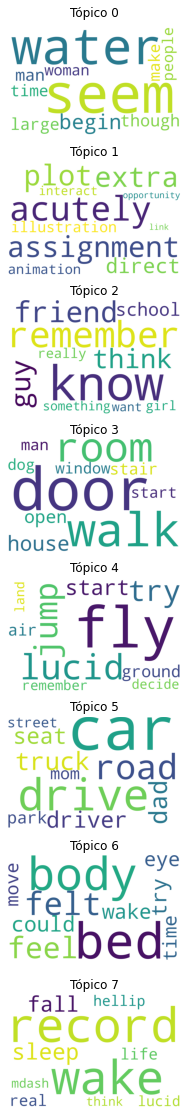

In [ ]:
# WordClouds
wc_atributos = {'height' : 800,
                'width' : 1200,
                'background_color' : 'white',
                'max_words' : 20
                } # Defino los parámetros que les voy a pasar a los wordclouds

# Creo la figura
fig, axs = plt.subplots(n_components, figsize = (6,20))

# Recorro para todas las componentes
for n in range(n_components):

  # 10 términos más pesados
  list_sorted = sorted(range(len(vocabulary)), reverse = True, key = lambda x: nmf.components_[n][x])[:10]

  # Diccionario término: peso
  comp_dict = {vocabulary[i]: nmf.components_[n][i] for i in list_sorted}

  # Creo el wordlcoud
  wc = WordCloud(**wc_atributos # De esta forma, le estoy diciendo a la función que expanda el diccionario de atributos de forma tal de que entienda lo que quiero que haga
                 ).generate_from_frequencies(comp_dict)

  axs[n].set_title('Tópico {}'.format(n))
  axs[n].imshow(wc)
  axs[n].axis('off')

plt.show()

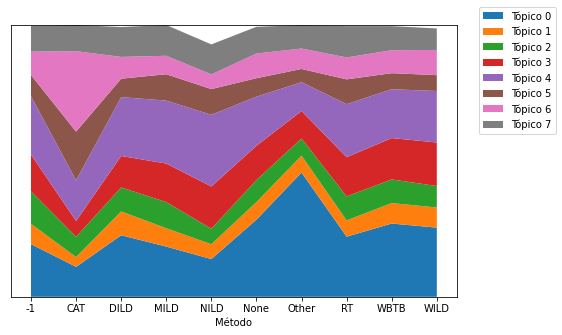

In [ ]:
# El eje x es el método
x = df_metodo.index

# El eje y son las distribuciones
y = df_metodo[['nmf_comp{}'.format(i) for i in range(n_components)]].to_numpy()

plt.figure(figsize = (8,5))
plt.stackplot(x, y.T) # Stackplot: sirve para graficar distribuciones
#plt.xlim([0, 90])
plt.ylim([0, 1.00])
plt.yticks([])
plt.xlabel('Método')
plt.legend(['Tópico {}'.format(i) for i in range(n_components)], loc = (1.05, 0.60))
plt.show()

In [ ]:
columnas = []
for n in range(n_components):
  columnas.append('nmf_comp{}'.format(n))

columnas.sort()

# find the column name of maximum
# values in every row
maxValueIndex = df[columnas].idxmax(axis = 1)
df["topico_nmf"] = maxValueIndex
print(df["topico_nmf"].shape)
df["topico_nmf"].value_counts()

(237446,)


nmf_comp4    60758
nmf_comp0    49200
nmf_comp3    32125
nmf_comp2    20843
nmf_comp6    19053
nmf_comp1    18975
nmf_comp5    18276
nmf_comp7    18216
Name: topico_nmf, dtype: int64

#COherencia de topicos lúcidos

In [ ]:
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

In [ ]:
# Creating a dictionary with the vocabulary
word2id = Dictionary( df_lucidos["raices"] )

In [ ]:
# Coherence model
cm = CoherenceModel(topics=topics,
                    texts=df_lucidos["raices"],
                    coherence='c_v',
                    dictionary=word2id)

coherence_per_topic = cm.get_coherence_per_topic()

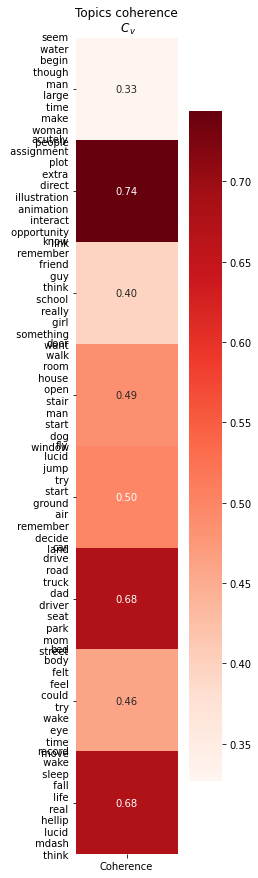

In [ ]:

topics_str = [ '\n '.join(t) for t in topics ]
data_topic_score = pd.DataFrame( data=zip(topics_str, coherence_per_topic), columns=['Topic', 'Coherence'] )
data_topic_score = data_topic_score.set_index('Topic')

fig, ax = plt.subplots( figsize=(4,15) )
ax.set_title("Topics coherence\n $C_v$")
sns.heatmap(data=data_topic_score, annot=True, square=True,
            cmap='Reds', fmt='.2f',
            linecolor='black', ax=ax )
plt.yticks( rotation=0 )
ax.set_xlabel('')
ax.set_ylabel('')
fig.show()

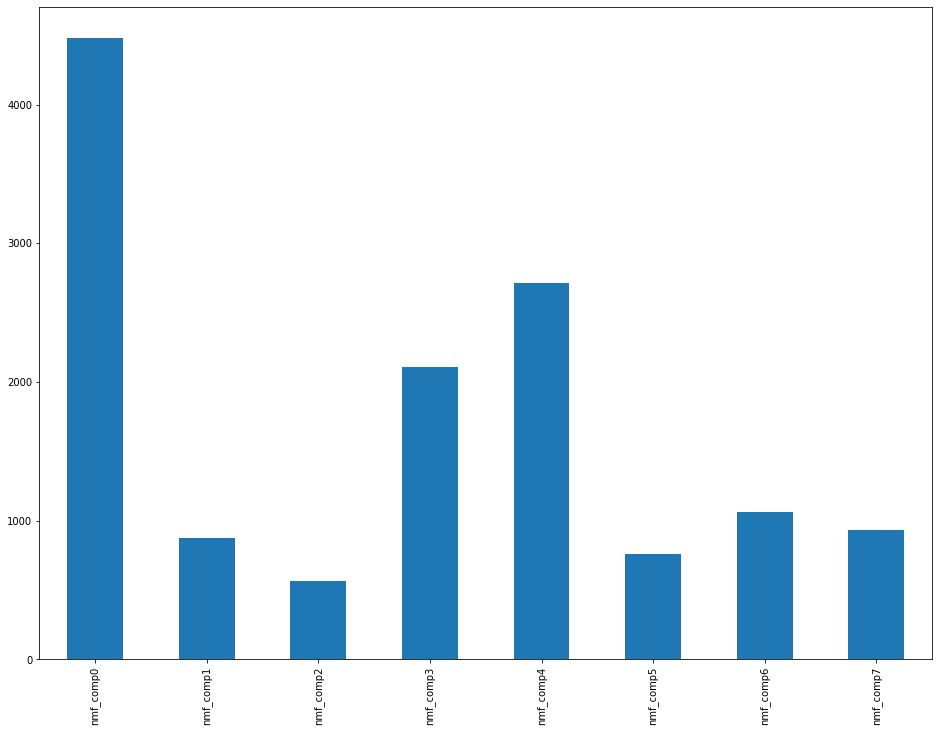

In [ ]:
#Cuántos sueños hay de cada tópico en total
df_lucidos["topico_nmf"].value_counts().sort_index().plot.bar()

Pendiente:
- Se podría ver el cruce entre ambas clasificaciones e tópicos para los sueños lucidos

# 3. ¿Cómo sueña?

In [ ]:
df_metodo = df.groupby('technique').mean()

# Inspeccionemoslo
df_metodo

,cohesion,lucidity,rating,nmf_comp0,nmf_comp1,nmf_comp2,nmf_comp3,nmf_comp4,nmf_comp5,nmf_comp6,nmf_comp7
technique,,,,,,,,,,,
-1,2.808586,-0.277209,0.129074,0.193783,0.074733,0.119502,0.135459,0.214694,0.077981,0.085847,0.094234
CAT,3.625000,2.500000,3.875000,0.110150,0.035902,0.074796,0.058049,0.149873,0.178886,0.295999,0.096346
DILD,2.739623,2.045283,2.664151,0.226504,0.087547,0.088328,0.115756,0.216466,0.067888,0.080161,0.109804
MILD,2.895238,0.688095,2.554762,0.184781,0.067454,0.096216,0.141794,0.231673,0.096951,0.067865,0.113265
NILD,3.142857,2.696429,2.571429,0.138812,0.054536,0.057091,0.155477,0.263779,0.094569,0.053992,0.110314
None,3.102086,2.076564,2.836443,0.283889,0.064603,0.081084,0.125980,0.180772,0.067938,0.090786,0.098361
Other,3.526222,2.162694,3.064362,0.457187,0.062117,0.063099,0.101113,0.106197,0.048544,0.075118,0.086030
RT,2.734531,1.650948,2.844311,0.221249,0.059792,0.088286,0.144205,0.195291,0.091184,0.080596,0.115406
WBTB,3.014553,2.278586,2.912682,0.269564,0.075315,0.086868,0.152352,0.179637,0.059045,0.084486,0.088575


In [ ]:
#Nos quedamos solo con los que contestaron green o red
index_red = df["intent"]=="red"
index_green = df["intent"]=="green"

index_or = index_green + index_red
df_or = df[index_or]

#Tabla de contingencia de lucidity e intent
pd.crosstab(df_or["intent"], df_or["lucidity"], margins=True)

lucidity,-1.0,1.25,2.5,3.75,5.0,All
intent,,,,,,
green,1120,434,470,500,655,3179
red,0,11908,8316,3765,2105,26094
All,1120,12342,8786,4265,2760,29273


In [ ]:
#Tabla de contingencia de técnica e intent
pd.crosstab(df_or["intent"], df_or["technique"], margins = True)

technique,-1,CAT,DILD,MILD,NILD,None,Other,RT,WBTB,WILD,All
intent,,,,,,,,,,,
green,550,8,120,204,10,362,917,470,221,317,3179
red,25752,0,20,8,4,168,33,57,31,21,26094
All,26302,8,140,212,14,530,950,527,252,338,29273


In [ ]:
#Tabla de contingencia de lucidity y técnica
tabla = pd.crosstab(df_or["lucidity"], df_or["technique"], margins = True)
tabla

technique,-1,CAT,DILD,MILD,NILD,None,Other,RT,WBTB,WILD,All
lucidity,,,,,,,,,,,
-1.0,240,0,38,124,1,90,257,210,56,104,1120
1.25,11888,3,18,22,3,134,125,67,41,41,12342
2.5,8300,2,31,18,5,133,156,58,53,30,8786
3.75,3752,3,31,34,2,96,155,97,47,48,4265
5.0,2122,0,22,14,3,77,257,95,55,115,2760
All,26302,8,140,212,14,530,950,527,252,338,29273


In [ ]:
df_lucidity  = df[(df['lucidity'] != -1)]
df_lucidity_cohesion  = df_lucidity[(df_lucidity['cohesion'] != -1)]

#Tabla de contingencia de lucidity e intent
pd.crosstab(df_lucidity_cohesion["cohesion"], df_lucidity_cohesion["lucidity"], margins=True)

lucidity,1.25,2.5,3.75,5.0,All
cohesion,,,,,
1.0,1552,1321,574,342,3789
2.0,1865,1321,586,186,3958
3.0,4809,2841,1412,613,9675
4.0,2535,1835,990,591,5951
5.0,1581,1468,703,784,4536
All,12342,8786,4265,2516,27909


In [ ]:
from scipy.stats import pearsonr
# seed random number generator

corr, _ = pearsonr(df_lucidity_cohesion["cohesion"], df_lucidity_cohesion["lucidity"])
print('Pearsons correlation entre lucidez y cohesión: %.3f' % corr)
#No

Pearsons correlation entre lucidez y cohesión: 0.086


#Nubes de palabras por intention: green/red

In [ ]:
#Me quedo con las raíces
raices = df_or["raices_unidas"].transpose()
raices_green = df_or["raices_unidas"][df_or["intent"]=="green"].transpose()
raices_red = df_or["raices_unidas"][df_or["intent"]=="red"].transpose()

#Las junto todos en un solo texto de raices
todos_textos_green = " ".join(raices_green)
todos_textos_red = " ".join(raices_red)

#Las cuento
print("Hay en total:", raices.size, "relatos")  #hay vacíos?
print("De los cuales son red:", raices_red.size)
print("La cant de green son:", raices_green.size)


Hay en total: 29273 relatos
De los cuales son red: 26094
La cant de green son: 3179


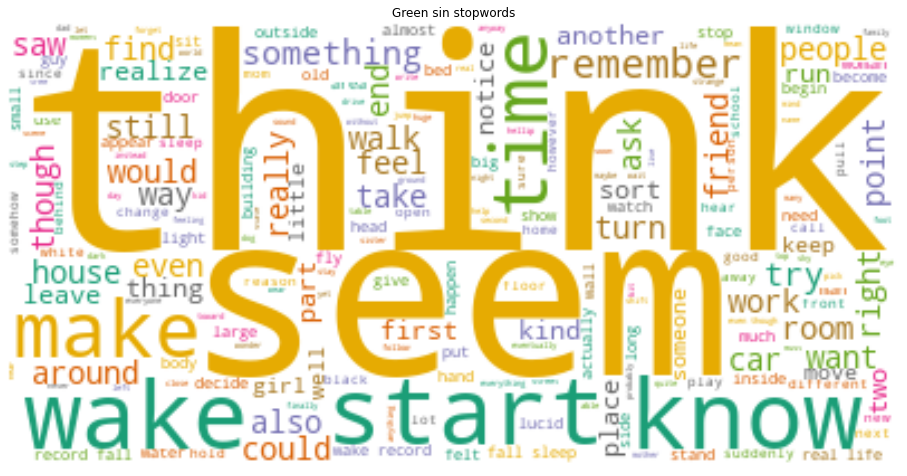

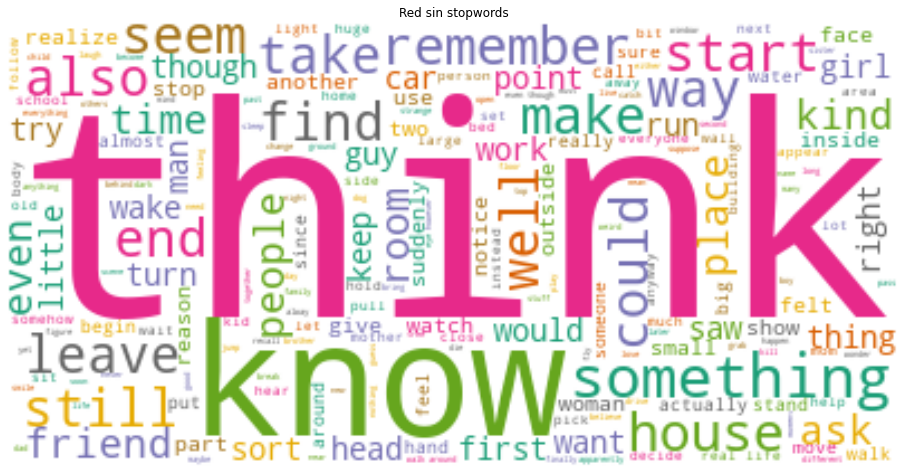

In [ ]:
#Sin stopwords

from wordcloud import WordCloud # importo la funcion WordCloud
import matplotlib.pyplot as plt

# Creo el objeto WordCloud sacando la lista de stopwords
wc = WordCloud(stopwords=stopwords, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [16,12] # tamaño de los plots

#Genero green
wc.generate(todos_textos_green)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Green sin stopwords")
plt.show()

#Genero red
wc.generate(todos_textos_red)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Red sin stopwords")
plt.show()


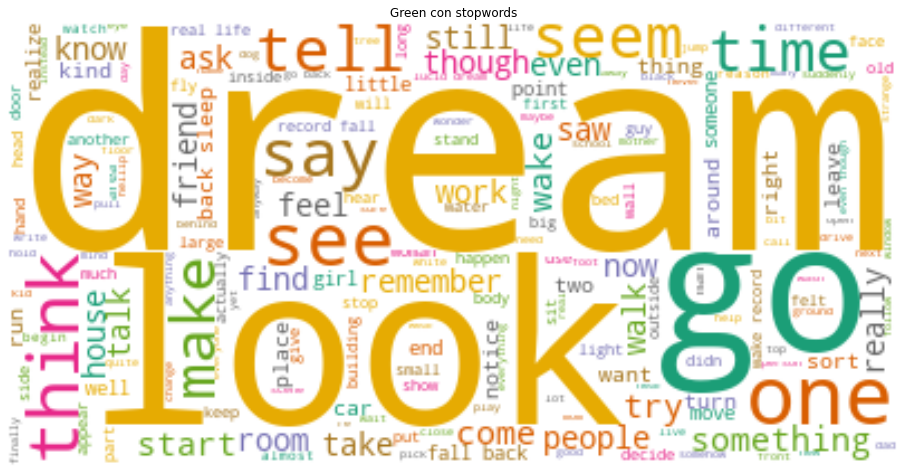

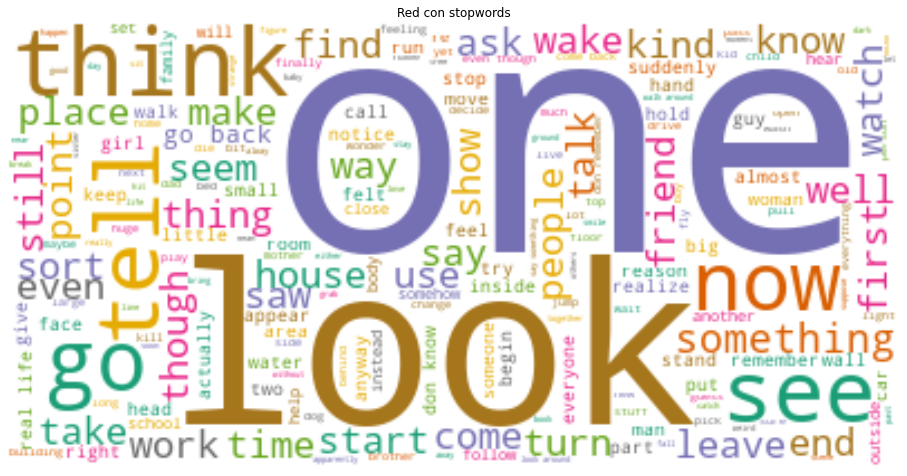

In [ ]:
# Ahora con stopwords
wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

wc.generate(todos_textos_green)  # acá le pido que genere los WC a partir del texto de cada año
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Green con stopwords")
plt.show()

wc.generate(todos_textos_red)  # acá le pido que genere los WC a partir del texto de cada año
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Red con stopwords")
plt.show()